In [127]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [128]:
with open("pose_data.json") as f:
    data = json.load(f)

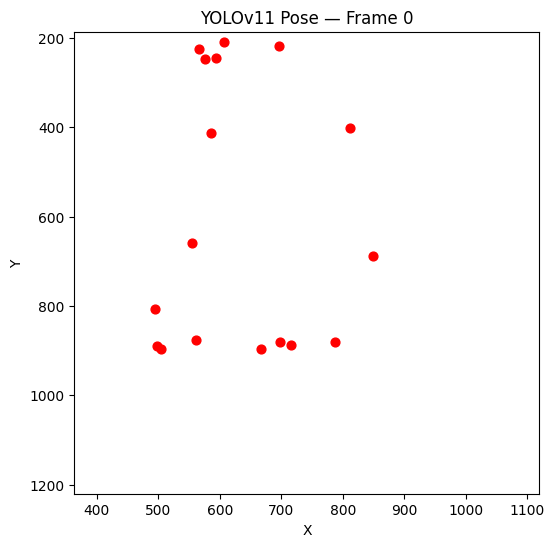

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# --- Example setup ---
video_id = 0
num_frames = len(data[video_id])

# --- Create figure and axis ---
fig, ax = plt.subplots(figsize=(6, 6))

# Initialize scatter plot (empty for now)
scatter = ax.scatter([], [], c='red', s=40)

# --- Setup axis labels ---
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title(f"YOLOv11 Pose Animation — Video {video_id}")

# Optional: Fix axis limits based on all frames (so it doesn’t resize every frame)
# You can comment this out if you prefer auto-scaling
all_keypoints = np.concatenate([np.array(f['keypoints']) for f in data[video_id]])
x_all, y_all = all_keypoints[:,0], all_keypoints[:,1]
ax.set_xlim(np.min(x_all) - 20, np.max(x_all) + 20)
ax.set_ylim(np.max(y_all) + 20, np.min(y_all) - 20)  # flip Y to match image coords

# --- Update function ---
def update(frame_id):
    frame_data = data[video_id][frame_id]
    keypoints = np.array(frame_data['keypoints'])
    x, y = keypoints[:, 0], keypoints[:, 1]

    scatter.set_offsets(np.c_[x, y])  # update the point positions
    ax.set_title(f"YOLOv11 Pose — Frame {frame_id}")
    return scatter,

# --- Create animation ---
ani = FuncAnimation(
    fig,
    update,
    frames=num_frames,
    interval=50,    # milliseconds between frames (~20 FPS)
    blit=False      # blit=False allows dynamic title updates
)


In [131]:
HTML(ani.to_jshtml())